# Case study on Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

## 1. Load the dataset into python environment


In [2]:
tit = pd.read_csv('titanic_dataset.csv')
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. Make ‘PassengerId’ as the index column


In [4]:
tit.set_index('PassengerId',inplace=True)
tit

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 3. Check the basic details of the dataset


In [5]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
tit.shape

(891, 11)

- There are a total of 891 entries and 11 columns
- In which 3 of the columns have Missing values.

In [7]:
tit.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
tit.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- Above is the number of Missing values in each columns

# 4. Fill in all the missing values present in all the columns in the dataset


- Age, Cabin,Embarked are the 3 columns with missing data


In [9]:
tit.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
tit.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

- Age is a float data type 
- and Cabin and Embarked is an object data type

1. Age

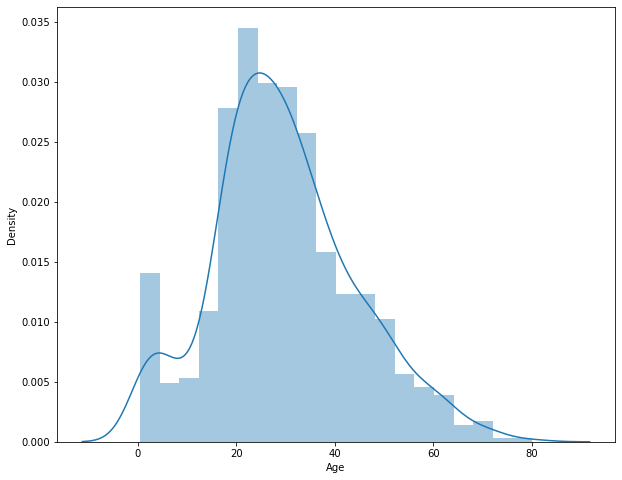

In [11]:
fig,ax =plt.subplots(figsize=(10,8))
sns.distplot(tit.Age)
plt.show()

In [12]:
tit['Age']= tit['Age'].fillna(tit['Age'].median())

2. Cabin

In [13]:
tit['Cabin'].isna().sum()

687

- Out of 891 entries 687 values are missing
- Which implies that more than 75% of the values are missing in Cabin column
- Since it is better to drop that column from the data set

In [14]:
tit.drop(['Cabin'],axis=1,inplace=True)

In [15]:
tit

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


3. Embarked

In [16]:
tit['Embarked'].isna().sum()

2

- There are only 2 values missing and since the data type is object, it is better to use mode for filling the missing value

In [17]:
tit['Embarked'].mode()

0    S
dtype: object

In [18]:
tit['Embarked']= tit['Embarked'].fillna(tit['Embarked'].mode()[0])

In [19]:
tit.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

- Now we could see that there is no missing values in any of the columns

## 5. Check and handle outliers in at least 3 columns in the dataset


1. Fare

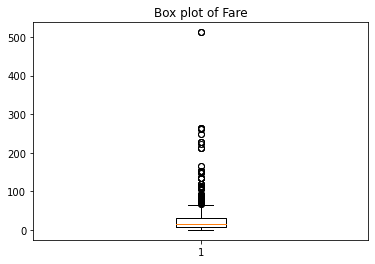

In [20]:
plt.boxplot(tit['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [21]:
Q1=np.quantile(tit['Fare'], .25)
Q2=np.quantile(tit['Fare'], .50)
Q3=np.quantile(tit['Fare'], .75)
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [22]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(IQR)
print(low_limit)
print(upper_limit)

23.0896
-26.724
65.6344


In [23]:
t=tit[(tit['Fare']<low_limit)|(tit['Fare']>upper_limit)]
ind=t.index
ind

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [24]:
tit.drop(ind, inplace=True)
tit

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


2. SibSp

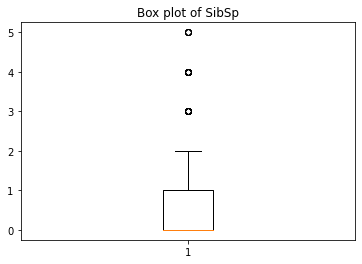

In [25]:
plt.boxplot(tit['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

In [26]:
Q1=np.quantile(tit['SibSp'], .25)
Q2=np.quantile(tit['SibSp'], .50)
Q3=np.quantile(tit['SibSp'], .75)
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [27]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(IQR)
print(low_limit)
print(upper_limit)

1.0
-1.5
2.5


In [28]:
d1=tit[(tit['SibSp']<low_limit)|(tit['SibSp']>upper_limit)]
ind=d1.index
ind

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [29]:
tit.drop(ind, inplace=True)
tit

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


3. Age

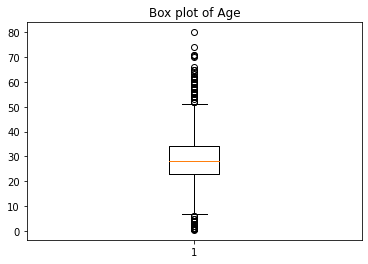

In [30]:
plt.boxplot(tit['Age'])
plt.title('Box plot of Age')
plt.show()

In [31]:
Q1=np.quantile(tit['Age'], .25)
Q2=np.quantile(tit['Age'], .50)
Q3=np.quantile(tit['Age'], .75)
print(Q1)
print(Q2)
print(Q3)

23.0
28.0
34.25


In [32]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(IQR)
print(low_limit)
print(upper_limit)

11.25
6.125
51.125


In [33]:
d1=tit[(tit['Age']<low_limit)|(tit['Age']>upper_limit)]
ind=d1.index
ind

Int64Index([  7,  11,  12,  16,  34,  44,  55,  59,  79,  95,  97, 117, 153,
            171, 173, 175, 184, 185, 194, 206, 233, 250, 253, 281, 318, 327,
            341, 349, 382, 408, 449, 450, 457, 468, 470, 480, 484, 488, 493,
            494, 514, 531, 546, 556, 571, 572, 583, 619, 626, 627, 631, 645,
            648, 673, 685, 692, 695, 696, 715, 721, 751, 752, 756, 773, 775,
            778, 789, 804, 828, 832, 852, 870],
           dtype='int64', name='PassengerId')

In [34]:
tit.drop(ind, inplace=True)
tit

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [35]:
tit.shape

(667, 10)

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [36]:
tit.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.328336,2.502249,28.907046,0.259370,0.256372,16.508370
std,0.469960,0.723632,8.489990,0.487269,0.750536,13.327935
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.250000
max,1.000000,3.000000,51.000000,2.000000,6.000000,65.000000


In [37]:
tit.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [38]:
y=tit['Survived']
x=tit.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)

In [39]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,667.000000,667.000000,667.000000,667.000000,667.000000
mean,2.502249,28.907046,0.259370,0.256372,16.508370
std,0.723632,8.489990,0.487269,0.750536,13.327935
min,1.000000,7.000000,0.000000,0.000000,0.000000
25%,2.000000,24.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.250000
max,3.000000,51.000000,2.000000,6.000000,65.000000


In [40]:
sc = preprocessing.MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.751124,0.497887,0.129685,0.042729,0.253975
std,0.361816,0.192954,0.243634,0.125089,0.205045
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.386364,0.000000,0.000000,0.120834
50%,1.000000,0.477273,0.000000,0.000000,0.161538
75%,1.000000,0.590909,0.000000,0.000000,0.357692
max,1.000000,1.000000,1.000000,1.000000,1.000000
